In [1]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sn
import os
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
# import cleanup
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import argparse
import extcolors
import cv2
import os
# Local Binary Pattern function
from skimage.feature import local_binary_pattern
# To calculate a normalized histogram 
from scipy.stats import itemfreq
from sklearn.preprocessing import normalize
import numpy as np
import csv
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
import extcolors

In [3]:
dataset_folder = r"E:\TY\SEM 2\CV\CP\Dataset"

In [4]:
classNames = os.listdir(r"E:\TY\SEM 2\CV\CP\Dataset")

In [9]:
images = []
labels = []
area_col = list()
r_color = list()
g_color = list()
b_color = list()
name_files = list()

# Shape Features

In [6]:
def areaofleaf(imgtemp):
    imgtemp = cv2.resize(imgtemp,(400,300))
    hsv = cv2.cvtColor(imgtemp, cv2.COLOR_BGR2HSV)

    # find the green color 
    mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255))
    # find the brown color
    mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
    # find the yellow color in the leaf
    mask_yellow = cv2.inRange(hsv, (21, 39, 64), (40, 255, 255))

    # find any of the three colors(green or brown or yellow) in the image
    mask = cv2.bitwise_or(mask_green, mask_brown)
    mask = cv2.bitwise_or(mask, mask_yellow)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(imgtemp,imgtemp, mask= mask)
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
    pixels = cv2.countNonZero(thresh)
    image_area = res.shape[0] * res.shape[1]
    area_ratio = (pixels / image_area) * 100
    return area_ratio

########################################################################################################################

# Color feature

https://in.mathworks.com/help/matlab/ref/hsv.html
https://stackoverflow.com/questions/47483951/how-to-define-a-threshold-value-to-detect-only-green-colour-objects-in-an-image/47483966#47483966

In [7]:
import cv2
import extcolors
colors_x = extcolors.extract_from_path(r"C:\Users\rohit\Downloads\Medicinal Leaf Dataset\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images\Syzygium Jambos (Rose Apple)\SJ-S-037.jpg", tolerance = 12, limit = 12)

colors_x[0][1][0]

(28, 49, 32)

#####################################################################################################################

# Labels

In [10]:
input0 = r"E:\TY\SEM 2\CV\CP\Dataset/"
temp = classNames
for i in temp:
    count = 0
    for filename in os.listdir(input0 + i):
        labels.append(temp.index(i))
        count += 1
        if count == 500:
                break
    print(i + ' : ' + str(count))

Artocarpus Heterophyllus (Jackfruit) : 56
Azadirachta Indica (Neem) : 60
Brassica Juncea (Indian Mustard) : 34
Citrus Limon (Lemon) : 57
Ficus Auriculata (Roxburgh fig) : 50
Ficus Religiosa (Peepal Tree) : 63
Hibiscus Rosa-sinensis : 43
Mangifera Indica (Mango) : 62
Mentha (Mint) : 97
Nyctanthes Arbor-tristis (Parijata) : 40
Ocimum Tenuiflorum (Tulsi) : 52
Piper Betle (Betel) : 48
Pongamia Pinnata (Indian Beech) : 61
Psidium Guajava (Guava) : 65
Punica Granatum (Pomegranate) : 79


In [8]:
input0 = r"E:\TY\SEM 2\CV\CP\Dataset/"
temp = classNames
for i in temp:
    count = 0
    for filename in os.listdir(input0 + i):
        img = cv2.imread(input0 + i + '/' + filename)
        name_files.append(filename)
        area_col.append(areaofleaf(img))
        colors_x = extcolors.extract_from_path(input0 + i + '/' + filename, tolerance = 12, limit = 12)
        r,g,b = colors_x[0][1][0]
        r_color.append(r)
        g_color.append(g)
        b_color.append(b)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (800,600))
        images.append(img)
        labels.append(temp.index(i))
        count += 1
        if count == 500:
                break
    print(i + ' : ' + str(count))

Artocarpus Heterophyllus (Jackfruit) : 56
Azadirachta Indica (Neem) : 60
Brassica Juncea (Indian Mustard) : 34
Citrus Limon (Lemon) : 57
Ficus Auriculata (Roxburgh fig) : 50
Ficus Religiosa (Peepal Tree) : 63
Hibiscus Rosa-sinensis : 43
Mangifera Indica (Mango) : 62
Mentha (Mint) : 97
Nyctanthes Arbor-tristis (Parijata) : 40
Ocimum Tenuiflorum (Tulsi) : 52
Piper Betle (Betel) : 48
Pongamia Pinnata (Indian Beech) : 61
Psidium Guajava (Guava) : 65
Punica Granatum (Pomegranate) : 79


In [8]:
images = np.array(images)
labels = np.array(labels)

In [17]:
from sklearn.feature_selection import SelectPercentile, chi2
sobel = pd.read_csv("sift_detectors/sift_detectors_final.csv")
ch2_value,p_value = chi2(sobel, labels)

In [18]:
ch2_value

array([ 1888.51369681, 20130.0690869 , 17921.1385742 , 16990.12203495,
        7218.31980991,  6166.13040309,  9842.05733953,  2249.2490193 ])

# GLCM features

In [32]:
def GLCM_feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):
        df = pd.DataFrame()
        
        img = dataset[image,:,:]
        n = 0
        dis = [1,2,3,4,5]
        ang = [0, np.pi/6, np.pi/4, np.pi/3, np.pi/2, 3*np.pi/4]
        # The combinations will give 150 features of a image
        for i in dis:
            for j in ang:
                n = n+1
                GLCM = greycomatrix(img, [i], [j])
                GLCM_Energy = greycoprops(GLCM, 'energy')[0]
                df['Energy' +"_"+ str(i)+"_"+str(round(j,2))] = GLCM_Energy
                GLCM_corr = greycoprops(GLCM, 'correlation')[0]
                df['Corr' +"_"+ str(i)+"_"+str(round(j,2))] = GLCM_corr       
                GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
                df['Diss_sim' +"_"+ str(i)+"_"+str(round(j,2))] = GLCM_diss       
                GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
                df['Homogen' +"_"+ str(i)+"_"+str(round(j,2))] = GLCM_hom       
                GLCM_contr = greycoprops(GLCM, 'contrast')[0]
                df['Contrast' +"_"+ str(i)+"_"+str(round(j,2))] = GLCM_contr    

        entropy = shannon_entropy(img)
        df['Entropy'] = entropy
        image_dataset = image_dataset.append(df)
    return image_dataset

In [11]:
image_features = GLCM_feature_extractor(images)

In [12]:
image_features.to_csv("GLCM_direct.csv")

In [13]:
image_features

,Energy_1_0,Corr_1_0,Diss_sim_1_0,Homogen_1_0,Contrast_1_0,Energy_1_0.52,Corr_1_0.52,Diss_sim_1_0.52,Homogen_1_0.52,Contrast_1_0.52,...,Corr_5_1.57,Diss_sim_5_1.57,Homogen_5_1.57,Contrast_5_1.57,Energy_5_2.36,Corr_5_2.36,Diss_sim_5_2.36,Homogen_5_2.36,Contrast_5_2.36,Entropy
0,0.444647,0.993126,4.890922,0.560598,125.309954,0.442876,0.990859,5.254590,0.550875,166.611649,...,0.967472,8.331996,0.526334,592.474849,0.433577,0.967805,8.600334,0.519783,586.148296,4.690518
0,0.449403,0.988735,5.961794,0.525255,152.681381,0.447746,0.986154,6.397630,0.521120,187.643448,...,0.960242,9.470424,0.502330,538.579723,0.438138,0.957700,9.879646,0.496599,572.853824,4.857272
0,0.491692,0.993422,4.044773,0.583122,87.541769,0.489983,0.991410,4.318767,0.579763,114.337985,...,0.969294,7.035475,0.560704,408.851643,0.481717,0.971711,6.870439,0.556330,376.728618,4.418815
0,0.537125,0.991884,3.955482,0.624507,98.647534,0.535496,0.989727,4.260873,0.620216,124.908327,...,0.970011,6.614672,0.598496,365.075374,0.528054,0.971848,6.484431,0.595339,342.964086,4.061211
0,0.438618,0.989405,5.595448,0.514223,134.834894,0.436693,0.987191,5.771455,0.511616,162.968055,...,0.957984,9.126605,0.492023,534.080118,0.427175,0.959858,9.137946,0.488263,509.949879,4.606364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.733438,0.997191,1.682236,0.785035,30.165119,0.732394,0.995647,1.951413,0.779942,46.801469,...,0.970683,4.287223,0.761796,316.328126,0.725312,0.968589,4.475372,0.759893,339.658717,2.413495
0,0.702797,0.998583,0.926195,0.799362,13.108657,0.701519,0.995831,1.315802,0.787140,38.605268,...,0.974183,3.434916,0.754336,239.826819,0.695942,0.980572,2.943982,0.755791,180.831974,2.606606
0,0.604128,0.995703,2.659220,0.676697,44.067685,0.602518,0.992795,3.241297,0.666749,73.944112,...,0.966493,6.011286,0.642530,344.600126,0.594281,0.967724,5.921613,0.642359,332.351649,3.338817
0,0.576865,0.996570,2.342503,0.663939,34.273742,0.575380,0.993572,2.988886,0.651073,64.254692,...,0.970911,5.663651,0.621463,291.273966,0.567335,0.971668,5.641306,0.620701,283.978854,3.528504


In [14]:
# sobel_lpb_df = pd.read_csv("sobel_lbp.csv")
# final_lbp = pd.DataFrame()
# for i in range(0,18):
#     final_lbp["sobel"+str(i)] = sobel_lpb_df[i]
# sobel_lpb_df_train,sobel_lpb_df_test,train_labels,test_labels = train_test_split(final_lbp, labels, train_size=0.8, random_state=5)

# Test train split

In [17]:
image_features["area_ratio"] = area_col
image_features["r_color"] = r_color
image_features["g_color"] = g_color
image_features["b_color"] = b_color
normalized_df = image_features
# normalized_df=(image_features-image_features.min())/(image_features.max()-image_features.min())

In [18]:
normalized_df.to_csv("GLCM_Shape_color.csv")

In [11]:
normalized_df = pd.read_csv("GLCM_Shape_color.csv")

In [12]:
sobel_lpb_df = pd.read_csv("sift_detectors/sift_detectors_final.csv")

In [13]:
sobel_lpb_df

,Unnamed: 0,0,1,2,3,4,5,Class
0,0,16,62,59,50,35,22,0
1,1,53,105,62,188,26,65,0
2,2,14,206,69,31,47,17,0
3,3,16,95,99,39,34,20,0
4,4,13,156,147,37,63,26,0
...,...,...,...,...,...,...,...,...
862,74,22,12,0,6,11,74,14
863,75,56,9,0,5,2,61,14
864,76,49,4,0,28,22,66,14
865,77,73,37,0,37,28,55,14


In [14]:
sobel_lbp_df = sobel_lpb_df.drop(["Class"], axis=1)

In [15]:
sobel_lbp_df

,Unnamed: 0,0,1,2,3,4,5
0,0,16,62,59,50,35,22
1,1,53,105,62,188,26,65
2,2,14,206,69,31,47,17
3,3,16,95,99,39,34,20
4,4,13,156,147,37,63,26
...,...,...,...,...,...,...,...
862,74,22,12,0,6,11,74
863,75,56,9,0,5,2,61
864,76,49,4,0,28,22,66
865,77,73,37,0,37,28,55


In [16]:
normalized_sobel_lpb_df = sobel_lbp_df
# normalized_sobel_lpb_df  = (sobel_lpb_df-sobel_lpb_df.min())/(sobel_lpb_df.max()-sobel_lpb_df.min())

In [17]:
# normalized_sobel_lpb_df = normalized_sobel_lpb_df.drop(["Class"], axis=1)
normalized_sobel_lpb_df.columns.str.match("Unnamed")
normalized_sobel_lpb_df = normalized_sobel_lpb_df.loc[:,~normalized_sobel_lpb_df.columns.str.match("Unnamed")]

In [18]:

normalized_sobel_lpb_df

,0,1,2,3,4,5
0,16,62,59,50,35,22
1,53,105,62,188,26,65
2,14,206,69,31,47,17
3,16,95,99,39,34,20
4,13,156,147,37,63,26
...,...,...,...,...,...,...
862,22,12,0,6,11,74
863,56,9,0,5,2,61
864,49,4,0,28,22,66
865,73,37,0,37,28,55


In [19]:
normalized_df.columns.str.match("Unnamed")
normalized_df = normalized_df.loc[:,~normalized_df.columns.str.match("Unnamed")]
normalized_df

,Energy_1_0,Corr_1_0,Diss_sim_1_0,Homogen_1_0,Contrast_1_0,Energy_1_0.52,Corr_1_0.52,Diss_sim_1_0.52,Homogen_1_0.52,Contrast_1_0.52,...,Energy_5_2.36,Corr_5_2.36,Diss_sim_5_2.36,Homogen_5_2.36,Contrast_5_2.36,Entropy,area_ratio,r_color,g_color,b_color
0,0.444647,0.993126,4.890922,0.560598,125.309954,0.442876,0.990859,5.254590,0.550875,166.611649,...,0.433577,0.967805,8.600334,0.519783,586.148296,4.690518,25.238333,32,43,29
1,0.449403,0.988735,5.961794,0.525255,152.681381,0.447746,0.986154,6.397630,0.521120,187.643448,...,0.438138,0.957700,9.879646,0.496599,572.853824,4.857272,49.558333,45,65,38
2,0.491692,0.993422,4.044773,0.583122,87.541769,0.489983,0.991410,4.318767,0.579763,114.337985,...,0.481717,0.971711,6.870439,0.556330,376.728618,4.418815,49.821667,54,68,45
3,0.537125,0.991884,3.955482,0.624507,98.647534,0.535496,0.989727,4.260873,0.620216,124.908327,...,0.528054,0.971848,6.484431,0.595339,342.964086,4.061211,45.120000,71,89,63
4,0.438618,0.989405,5.595448,0.514223,134.834894,0.436693,0.987191,5.771455,0.511616,162.968055,...,0.427175,0.959858,9.137946,0.488263,509.949879,4.606364,55.245000,79,98,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0.733438,0.997191,1.682236,0.785035,30.165119,0.732394,0.995647,1.951413,0.779942,46.801469,...,0.725312,0.968589,4.475372,0.759893,339.658717,2.413495,26.007500,63,88,30
863,0.702797,0.998583,0.926195,0.799362,13.108657,0.701519,0.995831,1.315802,0.787140,38.605268,...,0.695942,0.980572,2.943982,0.755791,180.831974,2.606606,29.068333,81,107,42
864,0.604128,0.995703,2.659220,0.676697,44.067685,0.602518,0.992795,3.241297,0.666749,73.944112,...,0.594281,0.967724,5.921613,0.642359,332.351649,3.338817,38.866667,82,108,43
865,0.576865,0.996570,2.342503,0.663939,34.273742,0.575380,0.993572,2.988886,0.651073,64.254692,...,0.567335,0.971668,5.641306,0.620701,283.978854,3.528504,41.540000,84,115,48


In [20]:
result = pd.concat([normalized_df, normalized_sobel_lpb_df], axis=1,ignore_index=True)

In [21]:
result

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0.444647,0.993126,4.890922,0.560598,125.309954,0.442876,0.990859,5.254590,0.550875,166.611649,...,25.238333,32,43,29,16,62,59,50,35,22
1,0.449403,0.988735,5.961794,0.525255,152.681381,0.447746,0.986154,6.397630,0.521120,187.643448,...,49.558333,45,65,38,53,105,62,188,26,65
2,0.491692,0.993422,4.044773,0.583122,87.541769,0.489983,0.991410,4.318767,0.579763,114.337985,...,49.821667,54,68,45,14,206,69,31,47,17
3,0.537125,0.991884,3.955482,0.624507,98.647534,0.535496,0.989727,4.260873,0.620216,124.908327,...,45.120000,71,89,63,16,95,99,39,34,20
4,0.438618,0.989405,5.595448,0.514223,134.834894,0.436693,0.987191,5.771455,0.511616,162.968055,...,55.245000,79,98,78,13,156,147,37,63,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0.733438,0.997191,1.682236,0.785035,30.165119,0.732394,0.995647,1.951413,0.779942,46.801469,...,26.007500,63,88,30,22,12,0,6,11,74
863,0.702797,0.998583,0.926195,0.799362,13.108657,0.701519,0.995831,1.315802,0.787140,38.605268,...,29.068333,81,107,42,56,9,0,5,2,61
864,0.604128,0.995703,2.659220,0.676697,44.067685,0.602518,0.992795,3.241297,0.666749,73.944112,...,38.866667,82,108,43,49,4,0,28,22,66
865,0.576865,0.996570,2.342503,0.663939,34.273742,0.575380,0.993572,2.988886,0.651073,64.254692,...,41.540000,84,115,48,73,37,0,37,28,55


In [22]:
train_images, test_images, train_labels, test_labels = train_test_split(result, labels, train_size=0.8, random_state=5)

In [23]:
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

# joblib.dump(le ,'E:\TY\SEM 2\CV\CP\encoder_model')

In [24]:
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [26]:
# area_col_train,area_col_test,train_labels,test_labels = train_test_split(area_col, labels, train_size=0.8, random_state=5)

In [27]:
# r_color_train,r_color_test,train_labels,test_labels = train_test_split(r_color, labels, train_size=0.8, random_state=5)

In [28]:
# g_color_train,g_color_test,train_labels,test_labels = train_test_split(g_color, labels, train_size=0.8, random_state=5)

In [29]:
# b_color_train,b_color_test,train_labels,test_labels = train_test_split(b_color, labels, train_size=0.8, random_state=5)

In [25]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [31]:
# X_for_ML = pd.read_csv("GLCM_Shape_color.csv")

In [32]:
# X_for_ML.to_csv("GLCM_Shape_color.csv")

In [27]:
from sklearn.feature_selection import SelectPercentile, chi2

In [28]:
ch2_value,p_value = chi2(x_train, y_train)

In [29]:
ch2_value

array([7.45091249e+00, 2.99885643e-03, 2.67662918e+02, 5.21601227e+00,
       8.87762132e+03, 7.48865245e+00, 3.59719947e-03, 2.22109545e+02,
       5.08013915e+00, 7.04745408e+03, 7.48865245e+00, 3.59719947e-03,
       2.22109545e+02, 5.08013915e+00, 7.04745408e+03, 7.48865245e+00,
       3.59719947e-03, 2.22109545e+02, 5.08013915e+00, 7.04745408e+03,
       7.45712096e+00, 1.98886371e-03, 1.86834911e+02, 4.47560534e+00,
       5.34626321e+03, 7.48796257e+00, 3.25389902e-03, 2.16661997e+02,
       5.08824043e+00, 6.07585666e+03, 7.48894197e+00, 6.12870518e-03,
       2.30411167e+02, 5.34187866e+00, 8.92572282e+03, 7.52704597e+00,
       5.52539639e-03, 2.10089243e+02, 5.31582363e+00, 7.50172828e+03,
       7.48865245e+00, 3.59719947e-03, 2.22109545e+02, 5.08013915e+00,
       7.04745408e+03, 7.53521880e+00, 5.80370049e-03, 1.69224744e+02,
       5.06305072e+00, 5.37969029e+03, 7.50675601e+00, 6.39154151e-03,
       1.71718802e+02, 4.87113876e+00, 5.83430951e+03, 7.48796257e+00,
      

In [30]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [31]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':25,  # earlier was 100 - decrease number of leaves 
              'max_depth':-1,   # earlier was 15 -  decrease max depth for better 
              'num_class':31,  #no.of unique values in the target class not inclusive of the end value
              'force_col_wise': 'true'}
              #'verbosity': -1}
lgb_model = lgb.train(lgbm_params, d_train, 180) #50 iterations. Increase iterations for small learning rates
joblib.dump(lgb_model,r"E:\TY\SEM 2\CV\CP\model_lgbm_B")

[LightGBM] [Info] Total Bins 36091
[LightGBM] [Info] Number of data points in the train set: 693, number of used features: 161
[LightGBM] [Info] Start training from score -2.669829
[LightGBM] [Info] Start training from score -2.552046
[LightGBM] [Info] Start training from score -3.282933
[LightGBM] [Info] Start training from score -2.690882
[LightGBM] [Info] Start training from score -2.803360
[LightGBM] [Info] Start training from score -2.609204
[LightGBM] [Info] Start training from score -3.245193
[LightGBM] [Info] Start training from score -2.649210
[LightGBM] [Info] Start training from score -2.210297
[LightGBM] [Info] Start training from score -3.075294
[LightGBM] [Info] Start training from score -2.827458
[LightGBM] [Info] Start training from score -2.852151
[LightGBM] [Info] Start training from score -2.649210
[LightGBM] [Info] Start training from score -2.712389
[LightGBM] [Info] Start training from score -2.366643
[LightGBM] [Info] Start training from score -34.538776
[LightGB

['E:\\TY\\SEM 2\\CV\\CP\\model_lgbm_B']

In [32]:
test_features = x_test
# test_features=(test_features-test_features.min())/(test_features.max()-test_features.min())
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

In [33]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))
print("Precision Score: ",metrics.precision_score(test_labels, test_prediction,average='macro'))
print("Recall Score: ",metrics.recall_score(test_labels, test_prediction,average='weighted'))
print("F1 Score: ",metrics.f1_score(test_labels, test_prediction,average='micro'))

print("Confusion Matrix: ")
print(confusion_matrix(y_test, test_prediction,))

Accuracy =  0.9137931034482759
Precision Score:  0.9156746031746031
Recall Score:  0.9137931034482759
F1 Score:  0.9137931034482759
Confusion Matrix: 
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 11  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0 18  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  1 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]]


In [1]:
# #Decision Tree Classifier
# from sklearn.metrics import accuracy_score
# import joblib
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# import sklearn.metrics as metrics
# #Assign model with Decision Tree classifier
# model_dt = DecisionTreeClassifier(max_depth=13)
# model_dt.fit(x_train, y_train)


# #predicting the traget variable using testing variables
# test_prediction = model_dt.predict(x_test)
# #Results
# print("Decision Tree Results")
# print("Decision Tree Accuracy: ",accuracy_score(y_test, test_prediction)*100,"%")
# from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))
# print("Precision Score: ",metrics.precision_score(test_labels, test_prediction,average='macro'))
# print("Recall Score: ",metrics.recall_score(test_labels, test_prediction,average='weighted'))
# print("F1 Score: ",metrics.f1_score(test_labels, test_prediction,average='micro'))

# #Print confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(test_labels, test_prediction)

# print("Confusion Matrix: ")
# print(confusion_matrix(y_test, test_prediction,))

Random Forest Clasifier
Test Accuracy: 0.9252873563218391
Precision Score:  0.9252873563218391
Recall Score:  0.9252873563218391
F1 Score:  0.9252873563218391
Confusion Matrix: 
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  9  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  1  0  0  0  0  0  0]
 [ 0  3  0  0  1  0 11  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 18  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]]


<AxesSubplot:>

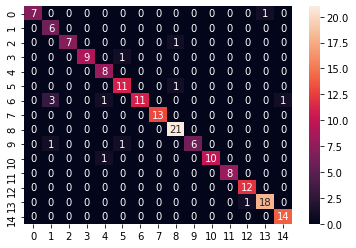

In [27]:
from sklearn.ensemble import RandomForestClassifier
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
model_rf = RandomForestClassifier(n_estimators = 50,random_state=1)

model_rf.fit(x_train, y_train)
# joblib.dump(model_rf,"./Trained_Models/SIFT/model_rf_A")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
# print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='po  sitive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
confusion_m = confusion_matrix(y_test, y_pred2,)
print(confusion_m)
sn.heatmap(confusion_m, annot=True)

In [2]:
# from sklearn.neighbors import KNeighborsClassifier
# model_rf = KNeighborsClassifier(n_neighbors=5)

# # x_test = test_for_RF

# model_rf.fit(x_train, y_train)
# joblib.dump(model_rf,"E:\TY\SEM 2\CV\CP\model_rf_B")

# y_pred2 = model_rf.predict(x_test)
# print("Random Forest Clasifier")
# print("Train Accuracy:",model_rf.score(x_train, train_labels))
# print("Test Accuracy:",model_rf.score(x_test, y_test))
# print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
# print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='po  sitive', average='micro'))
# print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
# print("Confusion Matrix: ")
# print(confusion_matrix(y_test, y_pred2,))
# # print("ROC curve ",metrics.plot_roc_curve(model_rf,x_test, y_test))

In [28]:
# test_image_path = r"E:\TY\SEM 2\CV\CP\Dataset\Pongamia Pinnata (Indian Beech)/PP-S-014.jpg"
# test_image_path = r"E:\TY\SEM 2\CV\CP\Dataset\Azadirachta Indica (Neem)\AI-S-056.jpg"
test_image_path = r"E:\TY\SEM 2\CV\CP\Dataset\Psidium Guajava (Guava)\PG-S-014.jpg"

In [33]:

test_image = cv2.imread(test_image_path)

test_img_area_col = list()
test_img_area_col.append(areaofleaf(test_image))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_img_colors_x = extcolors.extract_from_path(test_image_path, tolerance = 12, limit = 12)
tr,tg,tb = test_img_colors_x[0][1][0]
tr_color = list()
tr_color.append(tr)
tg_color = list()
tg_color.append(tg)
tb_color = list()
tb_color.append(tb)
test_image_dataset = list()
test_image_dataset.append(test_image)
test_image_dataset = np.array(test_image_dataset)
test_image_features = GLCM_feature_extractor(test_image_dataset)


In [34]:
test_image_features["area_ratio"] = test_img_area_col
test_image_features["r_color"] = tr_color
test_image_features["g_color"] = tg_color
test_image_features["b_color"] = tb_color
# test_normalized_df=(image_features-image_features.min())/(image_features.max()-image_features.min())

In [35]:
import pickle
import random

def load_kdata():
    with open("kmeanfull.dat",'rb') as f:
        grad_img = pickle.load(f)
    return grad_img

def save_kdata(data):
    with open("kmeanfull.dat", "wb") as f:
        pickle.dump(data, f)

In [36]:
tsift = cv2.SIFT_create()
tkeypoints, tdescriptors = tsift.detectAndCompute(test_image, None)
tout=pd.DataFrame(tdescriptors)
tkmean = load_kdata()
# tkmean = KMeans(n_clusters=6)
# tkmean.fit(tout)

In [37]:
data= list()
tsift1 = cv2.SIFT_create()
keypoints, descriptors = tsift1.detectAndCompute(test_image, None)
out1 = pd.DataFrame(descriptors)
array_double = np.array(out1, dtype=np.double)
a = tkmean.predict(array_double)
hist=np.histogram(a,bins=6)  #the range of 10 cluster assignments is divided into 6 intervals.
data.append(hist[0])
# csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)
Output = pd.DataFrame(data)

In [38]:
Output

,0,1,2,3,4,5
0,1268,773,1418,1991,690,898


In [39]:
tresult = pd.concat([test_image_features, Output], axis=1,ignore_index=True)

In [40]:
tresult

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0.424524,0.988672,6.286269,0.504782,163.7846,0.423577,0.986103,6.843493,0.497668,200.889916,...,56.230833,73,103,17,1268,773,1418,1991,690,898


In [42]:
t_predict = model_rf.predict(tresult)

In [43]:
output_list = classNames[t_predict[0]]
output_list

'Psidium Guajava (Guava)'

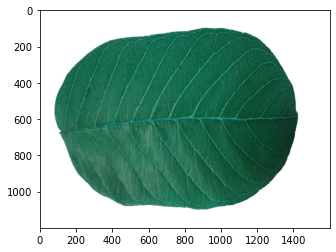

In [44]:
input_img = cv2.imread(test_image_path)
plt.imshow(input_img)
plt.show()

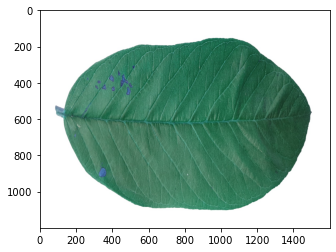

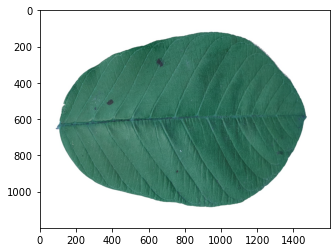

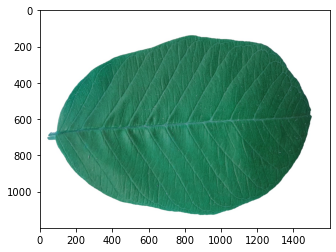

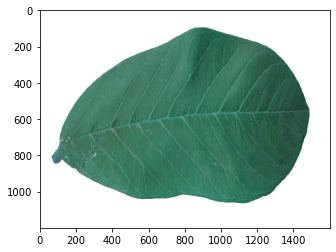

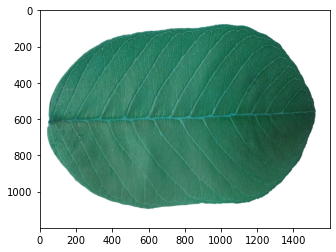

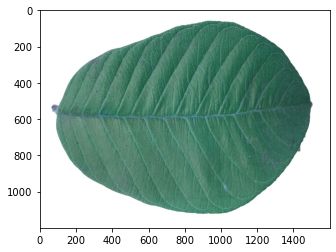

In [45]:
input0 = r"E:\TY\SEM 2\CV\CP\Dataset/"
count = 0
for filename in os.listdir(input0 + output_list):
    res_img = cv2.imread(input0 + output_list +"/"+ filename)
    if (count >5):
        break

    plt.imshow(res_img)
    plt.show()
    count = count + 1
